In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_5_class.csv to sentiment_5_class.csv


In [6]:
data=pd.read_csv("sentiment_5_class.csv")
data

,Phrase,Sentiment
0,injects just enough freshness into the proceed...,3
1,that,2
2,never plays as dramatic even when dramatic thi...,0
3,"None of this is very original , and it is n't ...",0
4,", Madonna gives her best performance since Abe...",3
...,...,...
18384,"to balance pointed , often incisive satire and...",3
18385,have to be a most hard-hearted person not to b...,4
18386,could young romantics out on a date,3
18387,could be this good,3


In [7]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_5_class_test.csv to sentiment_5_class_test.csv


In [8]:
test_data=pd.read_csv("sentiment_5_class_test.csv")
test_data

,Phrase,Sentiment
0,"makes for a touching love story , mainly becau...",3
1,a truly magical movie,4
2,check,3
3,is a remarkably accessible and haunting film .,4
4,are too cute,3
...,...,...
3673,feel realistic,3
3674,startling story,3
3675,hollow,1
3676,released the outtakes,2


In [9]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_5_class_train.csv to sentiment_5_class_train.csv


In [10]:
train_data=pd.read_csv("sentiment_5_class_train.csv")
train_data

,Phrase,Sentiment
0,the prisoner,2
1,The sheer joy and pride they took in their wor...,3
2,has never made a more sheerly beautiful film t...,3
3,the story has the sizzle of old news that has ...,3
4,far superior,4
...,...,...
14706,really cool bit,3
14707,Next Great Thing,3
14708,shockingly bad and absolutely unnecessary,0
14709,"First , for a movie that tries to be smart , i...",1


## Data Cleaning

In [11]:
# null value present or not
data.isna().sum()

Phrase       0
Sentiment    0
dtype: int64

## Data analysis and visualization

In [61]:
total_df=len(data)
total_df

18389

In [62]:
data.head()

,Phrase,Sentiment
0,injects just enough freshness into the proceed...,3
1,that,2
2,never plays as dramatic even when dramatic thi...,0
3,"None of this is very original , and it is n't ...",0
4,", Madonna gives her best performance since Abe...",3


In [63]:
sentiment_list=data.Sentiment.unique().tolist()
print(sentiment_list)

[3, 2, 0, 4, 1]


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18389 entries, 0 to 18388
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Phrase     18389 non-null  object
 1   Sentiment  18389 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 287.5+ KB


In [65]:
data.describe()

,Sentiment
count,18389.000000
mean,2.760672
std,1.113323
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,4.000000


In [66]:

shape_train_data=train_data.shape
print(shape_train_data)


(14711, 2)


In [67]:
shape_test_data=test_data.shape
print(shape_test_data)

(3678, 2)


## count of number of phrases according to sentiment type in training dataset

In [0]:

from collections import Counter

In [69]:


labels_count_train_data=Counter(train_data['Sentiment']) 
print(labels_count_train_data)


Counter({3: 7033, 4: 3649, 2: 1876, 1: 1165, 0: 988})


Text(0.5, 1.0, 'Number of phrase of each sentiment')

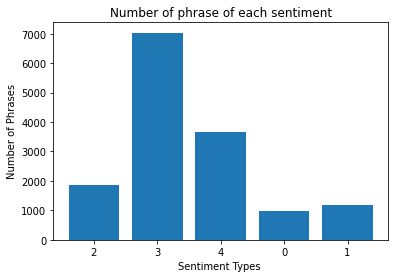

In [70]:

plt.bar(range(len(labels_count_train_data)),list(labels_count_train_data.values()),tick_label=list(labels_count_train_data.keys()))
plt.xlabel("Sentiment Types ")
plt.ylabel("Number of Phrases")
plt.title("Number of phrase of each sentiment")

#### count of number of phrases according to sentiment type in testing dataset

In [71]:

labels_count_test_data=Counter(test_data["Sentiment"])
print(labels_count_test_data)

Counter({3: 1759, 4: 912, 2: 469, 1: 291, 0: 247})


Text(0.5, 1.0, 'Number of phrase of each sentiment')

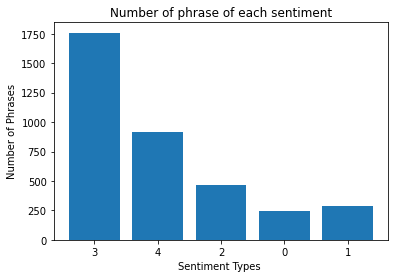

In [72]:
plt.bar(range(len(labels_count_test_data)),list(labels_count_test_data.values()),tick_label=list(labels_count_test_data.keys()))
plt.xlabel("Sentiment Types ")
plt.ylabel("Number of Phrases")
plt.title("Number of phrase of each sentiment")

## Feature extraction and preprocessing

In [0]:
x_train=train_data.Phrase.tolist()
x_test=test_data.Phrase.tolist()
# print(x_test)
y_train=train_data.Sentiment.tolist()
y_test=test_data.Sentiment.tolist()

### CountVectorizer


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
c_vectorizer = CountVectorizer()

In [15]:
c_vectorizer.fit(x_train)
c_vectorizer.get_feature_names()

['10',
 '100',
 '10th',
 '12',
 '120',
 '129',
 '13',
 '15',
 '168',
 '1790',
 '1899',
 '19',
 '1915',
 '1920',
 '1940s',
 '1950s',
 '1953',
 '1957',
 '1970s',
 '1971',
 '1975',
 '1980s',
 '1984',
 '1989',
 '1990',
 '19th',
 '20',
 '2000',
 '2002',
 '20th',
 '21st',
 '25',
 '26',
 '270',
 '30',
 '300',
 '3000',
 '3d',
 '48',
 '4ever',
 '50',
 '50s',
 '60',
 '60s',
 '70s',
 '71',
 '78',
 '80',
 '84',
 '86',
 '88',
 '90',
 '95',
 'abandon',
 'abandoned',
 'abel',
 'abhorrent',
 'ability',
 'able',
 'aborted',
 'abound',
 'about',
 'above',
 'abridged',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstract',
 'absurdist',
 'absurdly',
 'abundant',
 'abuse',
 'abyss',
 'academic',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'accepting',
 'accepts',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accompanies',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accomplishments',
 'account',
 'accountant',
 'accumulated',
 'ac

In [16]:
c_train_v=c_vectorizer.transform(x_train)

c_train_v.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:

c_test_v=c_vectorizer.transform(x_test)
c_test_v.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### TfidfVectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
t_vectorizer=TfidfVectorizer()
t_vectorizer.fit(x_train) 
t_vectorizer.get_feature_names()

['10',
 '100',
 '10th',
 '12',
 '120',
 '129',
 '13',
 '15',
 '168',
 '1790',
 '1899',
 '19',
 '1915',
 '1920',
 '1940s',
 '1950s',
 '1953',
 '1957',
 '1970s',
 '1971',
 '1975',
 '1980s',
 '1984',
 '1989',
 '1990',
 '19th',
 '20',
 '2000',
 '2002',
 '20th',
 '21st',
 '25',
 '26',
 '270',
 '30',
 '300',
 '3000',
 '3d',
 '48',
 '4ever',
 '50',
 '50s',
 '60',
 '60s',
 '70s',
 '71',
 '78',
 '80',
 '84',
 '86',
 '88',
 '90',
 '95',
 'abandon',
 'abandoned',
 'abel',
 'abhorrent',
 'ability',
 'able',
 'aborted',
 'abound',
 'about',
 'above',
 'abridged',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstract',
 'absurdist',
 'absurdly',
 'abundant',
 'abuse',
 'abyss',
 'academic',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'accepting',
 'accepts',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accompanies',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accomplishments',
 'account',
 'accountant',
 'accumulated',
 'ac

In [20]:

t_train_v=t_vectorizer.transform(x_train)
t_train_v.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
t_test_v=t_vectorizer.transform(x_test)
t_test_v.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Model Building and Grid Search

### Support Vector Machine(SVM)

In [0]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.svm import SVC

In [0]:
grid_param1 = {'kernel':('linear', 'rbf'), 'C':(1, 10,20)}

#### find best_score and params for CountVectorizer 

In [49]:

scorer = make_scorer(f1_score, average='micro')
clf = GridSearchCV(SVC(), grid_param1,scoring=scorer)
clf.fit(c_train_v, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (1, 10, 20), 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=micro), verbose=0)

In [50]:
print(clf.best_score_, clf.best_params_)

0.6987284810677747 {'C': 10, 'kernel': 'rbf'}


#### find best_score and params for TfidfVectorizer 

In [52]:
scorer = make_scorer(f1_score, average='micro')
clf = GridSearchCV(SVC(), grid_param1,scoring=scorer)
clf.fit(t_train_v, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (1, 10, 20), 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=micro), verbose=0)

In [53]:
print(clf.best_score_, clf.best_params_)

0.6977766782555387 {'C': 10, 'kernel': 'rbf'}


##  Model Evaluation 
CountVectorizer

In [0]:
import sklearn.metrics as metrics


In [54]:
model = SVC(random_state=1,kernel='rbf', C=10)
model.fit(c_train_v, y_train)
y_pred = model.predict(c_test_v)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       247
           1       0.63      0.56      0.59       291
           2       0.70      0.72      0.71       469
           3       0.74      0.80      0.77      1759
           4       0.71      0.64      0.67       912

    accuracy                           0.72      3678
   macro avg       0.71      0.68      0.69      3678
weighted avg       0.72      0.72      0.72      3678



## Model Evalution
TfidfVectorizer 

In [55]:
model = SVC(random_state=1,kernel='rbf', C=1)
model.fit(t_train_v, y_train)
y_pred = model.predict(c_test_v)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.05      0.10       247
           1       0.62      0.08      0.14       291
           2       0.74      0.15      0.25       469
           3       0.50      0.97      0.66      1759
           4       0.65      0.05      0.10       912

    accuracy                           0.51      3678
   macro avg       0.63      0.26      0.25      3678
weighted avg       0.59      0.51      0.39      3678



## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier


### Model Building and Grid Search

In [0]:
grid_param2 = {
    'max_depth': (3, 5, 7, 9, 11, 13),
    'min_samples_split': (2, 4, 6, 8, 10)
}

In [26]:
scorer = make_scorer(f1_score, average='micro')
clf=GridSearchCV(DecisionTreeClassifier(),grid_param2,scoring=scorer)
clf.fit(c_train_v, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': (3, 5, 7, 9, 11, 13),
               

In [27]:
print(clf.best_score_, clf.best_params_)

0.5118621587178831 {'max_depth': 13, 'min_samples_split': 8}


## Model Evalution

In [28]:
import sklearn.metrics as metrics
model =DecisionTreeClassifier(random_state=1,max_depth=13,min_samples_split=8)
model.fit(c_train_v, y_train)
preds = model.predict(c_test_v)
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.61      0.11      0.19       247
           1       0.71      0.05      0.10       291
           2       0.71      0.01      0.02       469
           3       0.50      0.97      0.66      1759
           4       0.69      0.16      0.26       912

    accuracy                           0.51      3678
   macro avg       0.65      0.26      0.24      3678
weighted avg       0.60      0.51      0.40      3678



# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:



grid_param3 = {
    'max_depth': (3, 5, 7, 9, 11, 13),
    'min_samples_split': (2, 4, 6, 8, 10),
    'n_estimators':(10,50,100),

}

In [31]:

scorer = make_scorer(f1_score, average='micro')
clf=GridSearchCV(RandomForestClassifier(),grid_param3,scoring=scorer)
clf.fit(c_train_v, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [32]:
print(clf.best_score_, clf.best_params_)

0.48970156517914704 {'max_depth': 13, 'min_samples_split': 6, 'n_estimators': 10}


## Model Evalution

In [33]:
model =RandomForestClassifier(n_estimators=10,min_samples_split=6,max_depth=13)
# print(c_train_v.shape)
# print(y_train.shape)
model.fit(c_train_v, y_train)
preds = model.predict(c_train_v)
print(metrics.classification_report(y_test, preds))

ValueError: ignored

## Adaboost Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
grid_param4 = {
    'learning_rate':(0.001,0.1),
    'n_estimators':(10,50,100),

}

In [38]:
scorer = make_scorer(f1_score, average='micro')
clf=GridSearchCV(AdaBoostClassifier(),grid_param4,scoring=scorer)
clf.fit(c_train_v, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': (0.001, 0.1),
                         'n_estimators': (10, 50, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=micro), verbose=0)

In [39]:
print(clf.best_score_, clf.best_params_)

0.4845353814013965 {'learning_rate': 0.1, 'n_estimators': 100}


## Model Evalution

In [40]:
model =AdaBoostClassifier(learning_rate=0.1, n_estimators=100)
model.fit(c_train_v, y_train)
preds = model.predict(c_test_v)
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.09      0.15       247
           1       0.33      0.00      0.01       291
           2       0.20      0.00      0.00       469
           3       0.49      1.00      0.65      1759
           4       0.54      0.02      0.03       912

    accuracy                           0.49      3678
   macro avg       0.48      0.22      0.17      3678
weighted avg       0.47      0.49      0.33      3678



## Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:


grid_param5 = {
    # 'max_depth': (3, 5, 7, 9, 11, 13),
    'min_samples_split': (2, 4, 6, 8),
    'n_estimators':(10,50),

}

In [58]:
scorer = make_scorer(f1_score, average='micro')
clf=GridSearchCV(GradientBoostingClassifier(),grid_param5,scoring=scorer)
clf.fit(c_train_v, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [59]:
print(clf.best_score_, clf.best_params_)

0.5280402887123647 {'min_samples_split': 2, 'n_estimators': 50}


## Model Evalution

In [60]:
model =GradientBoostingClassifier(min_samples_split=2, n_estimators=50)
model.fit(c_train_v, y_train)
preds = model.predict(c_test_v)
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.14      0.24       247
           1       0.68      0.06      0.11       291
           2       0.76      0.03      0.05       469
           3       0.51      0.96      0.66      1759
           4       0.69      0.21      0.32       912

    accuracy                           0.53      3678
   macro avg       0.70      0.28      0.28      3678
weighted avg       0.62      0.53      0.43      3678

